In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
a  = np.array([0,0,1])
b = np.array([1,1,1])

def modulus(a):
    mod = 0.
    for c in a:
        mod += c**2
    return np.sqrt(mod)

def normalize(a):
    mod = 0.
    for c in a:
        mod += c**2
    return a/np.sqrt(mod)

def random_point_on_sphere():
    theta = np.arccos(np.random.uniform(-1,1))
    phi = np.random.uniform(0,2*np.pi)
    v = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    return v

In [13]:
class event3:
    
    def __init__(self,total_energy):
        self.E = float(total_energy)
        
        # assign directions to photons
        v1 = random_point_on_sphere()
        v2 = random_point_on_sphere()
        
        theta = np.arccos(np.dot(v1,v2))
        alpha = np.random.uniform(0,theta)
        c1 = np.sin(theta - alpha)/np.sin(theta)
        c2 = np.sin(alpha)/np.sin(theta)
        v3 = -c1*v1 - c2*v2
        
        #assign energies to photons
        e3 = self.E/(1 + c1 + c2)
        e2 = e3*c2
        e1 = e3*c1
        
        self.vs = np.array([v1,v2,v3])
        self.es = np.array([e1,e2,e3])
        
    def plot2D(self):
        plt.figure()
        plt.xlim(-self.E/2,self.E/2)
        plt.ylim(-self.E/2,self.E/2)
        plt.plot([0,self.es[0]],[0,0])
        t2 = np.arccos(np.dot(self.vs[0],self.vs[1]))
        plt.plot([0,self.es[1]*np.cos(t2)],[0,self.es[1]*np.sin(t2)])
        t3 = np.arccos(np.dot(self.vs[0],self.vs[2]))
        plt.plot([0,self.es[2]*np.cos(t3)],[0,-self.es[2]*np.sin(t3)])
        plt.show()
        
    def plot3D(self,ax):
        for i,v in enumerate(self.vs):
            ax.plot([0,self.es[i]*v[0]],[0,self.es[i]*v[1]],[0,self.es[i]*v[2]])
        return 
    
def no_Filter(ev):
    return True
    
class total_spectra:
    
    def __init__(self):
        self.energies = []
        self.evcount = 0
        self.n = 0
        
    def measure(self,ev,Filter=no_Filter):
        if Filter(ev):
            self.evcount += 1
            if self.energies == []:
                self.n = len(ev.es)
                for e in ev.es:
                    self.energies.append([e])
            for i,e in enumerate(ev.es):
                    self.energies[i].append(e)
                
    def plot_spectra(self,numbins,total_energy):
        bins = np.arange(0,0.5*total_energy,0.5*total_energy/numbins)
        fig,ax = plt.subplots(1,self.n,sharey=True)
        fig.suptitle('Entries: %d' %self.evcount)
        for i in range(self.n):
            ax[i].set_title('photon %d' %(i+1))
            ax[i].hist(self.energies[i],bins=bins)
    

    
class detectors:
    
    def __init__(self,versors,distances,radii):
        self.versors = np.array(versors) # directions of the detectors
        self.radii = np.array(radii) # radii of the detectors
        self.n = len(self.radii)
        self.distances = np.array(distances) # distances of the detectors from the source
        self.evcount = 0
        self.acquired_data = []
        for i in range(self.n):
            self.acquired_data.append([])
#         self.activations = [False]*self.n
        
    def reset(self):
        self.evcount = 0
        self.acquired_data = []
        for i in range(self.n):
            self.acquired_data.append([])
        
    def measure(self,ev,verbose=False):
        triggered = False
        ens = []
        totE = 0.
        for i,v in enumerate(self.versors):
            triggered = False
            for j,v_ph in enumerate(ev.vs):
                t = np.arccos(np.dot(v,v_ph))
                if t < np.arctan(1.*self.radii[i]/self.distances[i]):
                    ens.append(ev.es[j])
                    totE += ev.es[j]
                    triggered = True
                    break
            if not triggered:
                break
        if not triggered:
            return False
        
        # successfully triggered
        self.evcount += 1
        if verbose:
            print('Triggered: event %d, total energy %f' %(self.evcount, totE))
        for i in range(self.n):
            self.acquired_data[i].append(ens[i])
        return True
    
    
    
    def plot_spectra(self,numbins,total_energy):
        bins = np.arange(0,0.5*total_energy,0.5*total_energy/numbins)
        fig,ax = plt.subplots(1,self.n,sharey=True)
        fig.suptitle('Entries: %d' %self.evcount)
        for i in range(self.n):
            ax[i].set_title('DET%d' %(i+1))
            ax[i].hist(self.acquired_data[i],bins=bins)
            ax[i].plot([total_energy/3,total_energy/3],[0,np.sqrt(self.evcount)])
        

<IPython.core.display.Javascript object>


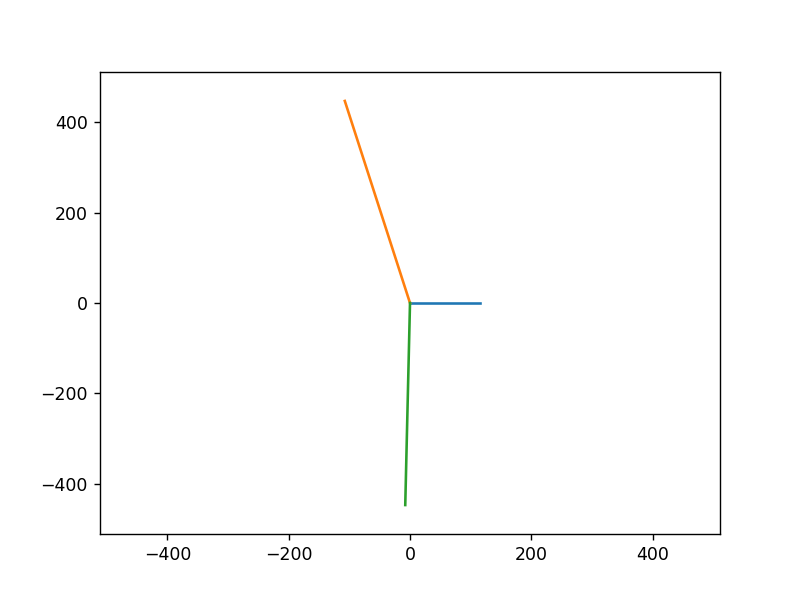

1022.0 [5.68434189e-14 0.00000000e+00 2.84217094e-14]


In [6]:
# plotting events
%matplotlib notebook
ev = event3(1022)

# fig = pyplot.figure()
# ax = Axes3D(fig)
# ev.plot3D(ax)

ev.plot2D()
e = 0
p = np.array([0.,0.,0.])
for i in range(3):
    e += ev.es[i]
    p += ev.vs[i]*ev.es[i]
    
print(e,p)

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:31<00:00, 10929.57it/s]


<IPython.core.display.Javascript object>


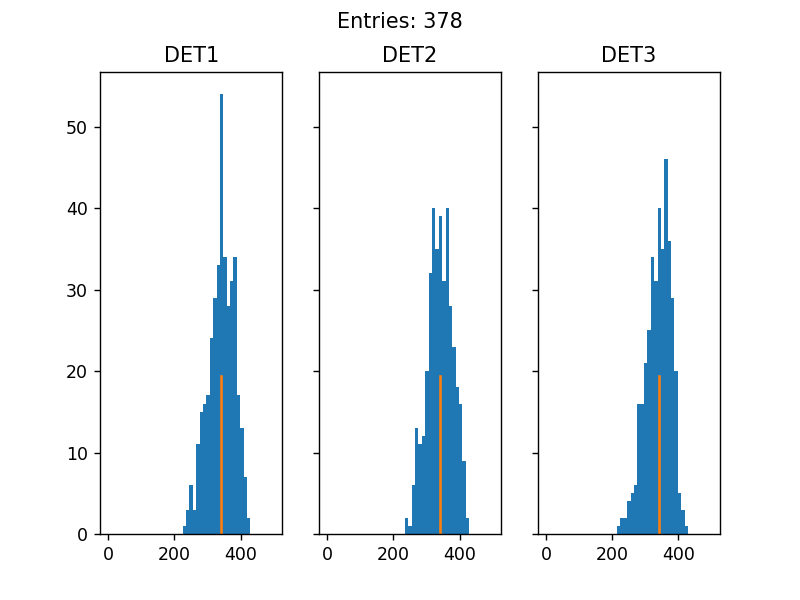

<IPython.core.display.Javascript object>


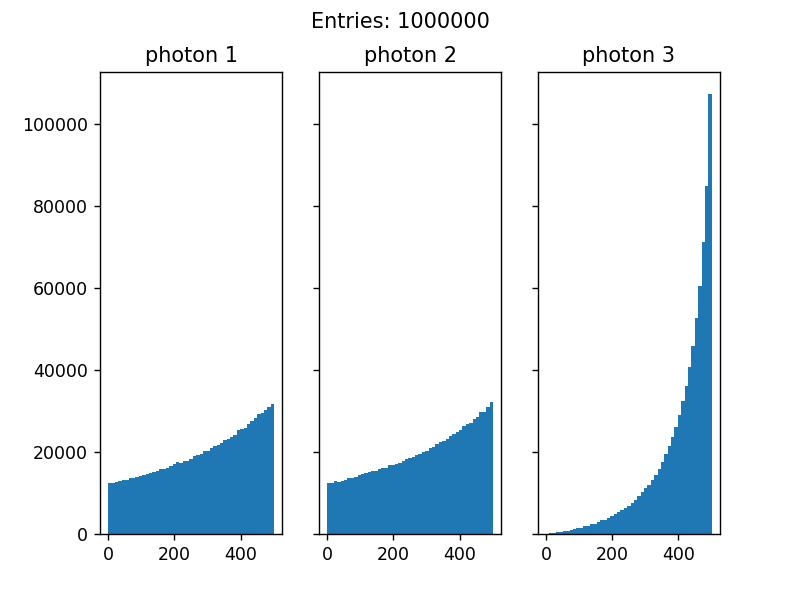

In [7]:
d1 = np.array([1,0,0])
d2 = np.array([np.cos(2*np.pi/3),np.sin(2*np.pi/3),0])
d3 = np.array([np.cos(2*np.pi/3),-np.sin(2*np.pi/3),0])

tot_events = int(1e6)
total_energy = 1022

D = detectors(versors=[d1,d2,d3],distances=[18]*3,radii=[5]*3)
C = total_spectra()

for i in tqdm(range(tot_events)):
    ev = event3(total_energy)
    D.measure(ev,verbose=False)
    C.measure(ev)
D.plot_spectra(numbins=50,total_energy=total_energy)
C.plot_spectra(numbins=50,total_energy=total_energy)

In [8]:
ens = np.array(C.energies)

(3, 1000001)

In [11]:
np.mean(ens)

340.66666666666674

<IPython.core.display.Javascript object>


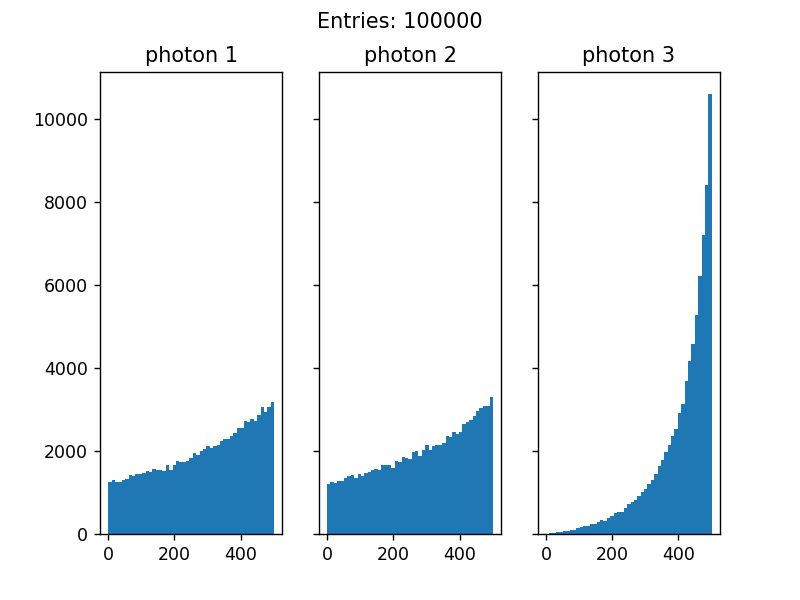

In [20]:
total_energy = 1022
N = 100000
lowE = 0
highE = 340

def Filter(ev):
    if ev.es[2] > lowE and ev.es[2] < highE:
        return True
    else:
        return False

C = total_spectra()
for i in range(N):
    ev = event3(total_energy)
    C.measure(ev,Filter=no_Filter)
C.plot_spectra(numbins=50,total_energy=total_energy)

<IPython.core.display.Javascript object>


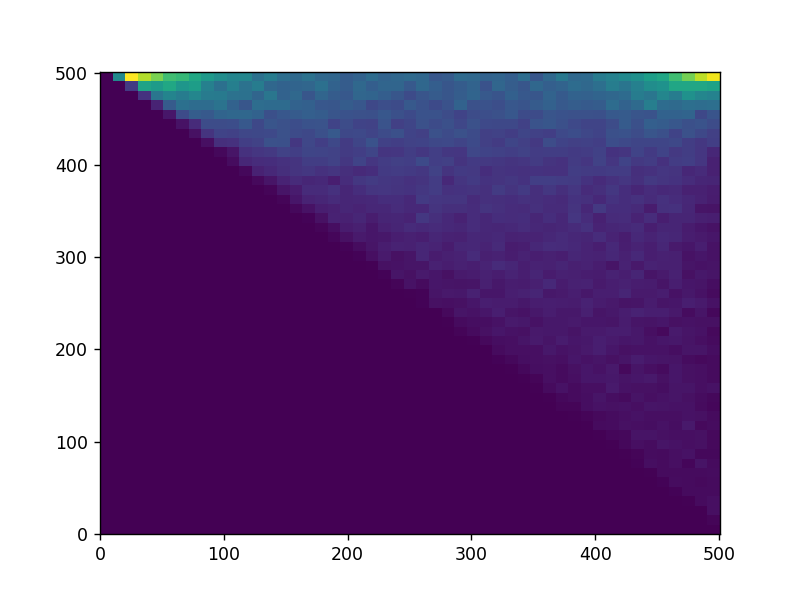

In [23]:
numbins = 50

bins = np.arange(0,0.5*total_energy,0.5*total_energy/numbins)

plt.figure()
plt.hist2d(C.energies[1],C.energies[2],bins=bins)
plt.show()

<IPython.core.display.Javascript object>


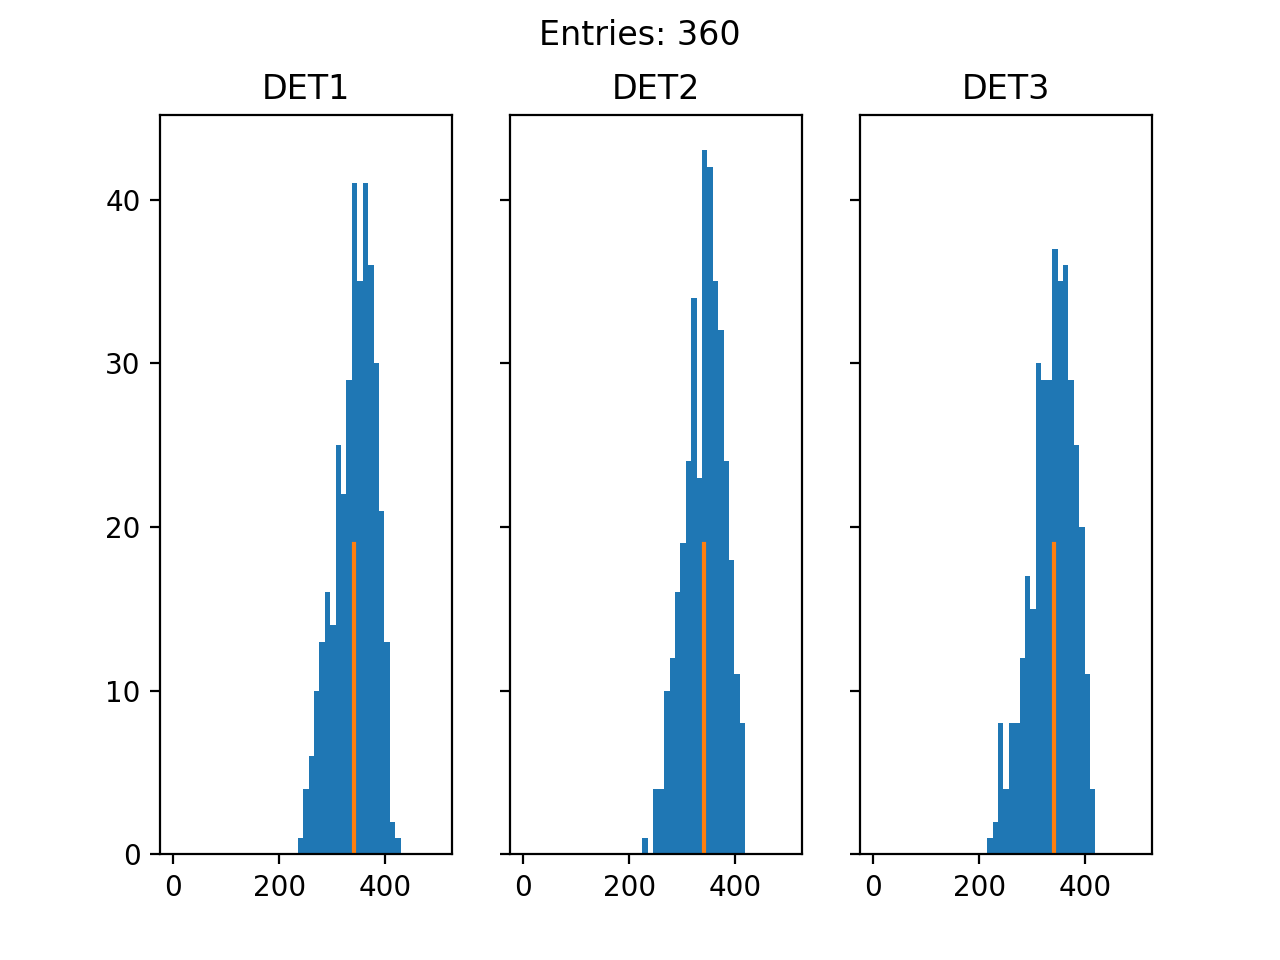

In [79]:
D.plot_spectra(numbins=50,total_energy=total_energy)